# Train a FastText model on the SLED categorization dataset

In [ ]:
# Install and import fastText
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip

%cd fastText-0.9.2

!pip install .
import fasttext as ft

In [ ]:
%cd /content
%pwd

/content


'/content'

In [ ]:
# Install the parse module
!pip install parse

In [ ]:
# Import necessary libraries
import parse
import fasttext as ft
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.metrics import classification_report

In [ ]:
# Upload the data to google collab and define paths to them
# (click on the Folder on the right of the window, and click on the file icon ("Upload to session storage")
train = "/content/sled_categorization_TRAINLARGE_PREPROCESSED.txt"

test = "/content/sled_categorization_TEST_PREPROCESSED.txt"

dev = "/content/sled_categorization_DEV_PREPROCESSED.txt"

In [ ]:
# Parse the file to separate labels from text
def parse_file(path: str):
    """Reads fasttext formatted file and returns labels, texts."""
    with open(path, "r") as f:
        content = f.readlines()
    pattern = "{label} {text}\n"
    p = parse.compile(pattern)

    labels, texts = list(), list()
    for line in content:
        rez = p.parse(line)
        if rez is not None:
            labels.append(rez["label"])
            texts.append(rez["text"])
        else:
            print("error parsing line ", line)
    return labels, texts

In [ ]:
# Create a list of texts and labels from the train file
train_labels, train_texts = parse_file(train)

# Inspect the results
train_texts[:3]

error parsing line  __label__znanost to je posnetek sončnega mrka ki se je zgodil 28 maja 1900 podjetje bfi in kraljeva astronomska družba sta najstarejši posnetek popolnega sočnega mrka ustrezno digitalizirala z najnovejšo tehnologijo in ga iz arhiva prestavila na youtube  lepo je obuditi dela iz naše znanstvene zgodovine astronomi so vedno odprtih rok sprejemali novo tehnologijo kadri sonč


['vožnja na vrtiljaku v zabaviščnem parku v francoskem rennesu bi morala trajati le šest minut a se je na silvestrsko noč za osem francozov spremenila v pravo nočno moro zaradi tehnične okvare so namreč obtičali 52 metrov visoko in na rešitev čakali več kot osem ur  slišali smo glasen pok nato pa videli iskre ki so švigale okoli je povedal eden od nesrečnih francozov ki so obtičali na orkanskem vrtiljaku bombermaxxx ta je sestavljen iz 52 metrov dolge železne roke na obeh koncih pa so sedišča  trem odraslim in petim najstnikom starim med 13 in 17 je na pomoč priskočilo 20 gasilcev s petimi gasilskimi vozili a neuspešno saj je bila njihova 30-metrska lestev prekratka nato so poklicali helikopter a so potrebovali več ur da so pripravili vse potrebno za reševanje prvi potnik je bil na tleh ob 4 uri zadnji pa ob 6',
 'na tolminskem se je dopoldne zgodila prometna nesreča v kateri je umrl 43-letni voznik osebnega avtomobila po tem ko je zapeljal v 100 metrov globoko grapo  nesreča se je zgo

In [ ]:
# Create a list of labels - by creating a set, we get only unique labels from the list of all labels,
# then we transform the set back to a list

LABELS = list(set(train_labels))

LABELS

['__label__druzba',
 '__label__izobrazevanje',
 '__label__prosticas',
 '__label__sport',
 '__label__gospodarstvo',
 '__label__okolje',
 '__label__znanost',
 '__label__politika',
 '__label__crnakronika',
 '__label__vreme',
 '__label__zabava',
 '__label__zdravje',
 '__label__kultura']

## Hyperparameters search

In [ ]:
def prediction_to_label(prediction):
    """Transforms predictions as returned by fasttext into pure labels."""
    return np.array(prediction[0])[:, 0]

# Create a function to evaluate the results (it calculates the scores and creates a confusion matrix)
def plot_cm():
    """
    Plots confusion matrix for prediction on the test set.
    Takes the predictions, named as y_pred, true values, named as y_true,
    and labels, named as LABELS.
    """
    # Plot the confusion matrix:
    cm = confusion_matrix(y_true, y_pred, labels=LABELS)
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
    classNames = LABELS
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)

    plt.tight_layout()
    fig1 = plt.gcf()
    plt.show()
    plt.draw()

    # Calculate micro and macro F1 scores
    microF1 = f1_score(y_true, y_pred, labels=LABELS, average ="micro")
    macroF1 = f1_score(y_true, y_pred, labels=LABELS, average ="macro")

    print(f"Micro F1: {microF1:0.4}, Macro F1: {macroF1:0.4}")

    return microF1, macroF1

I'll experiment with various epochs to see which epoch number provides the best results

In [ ]:
# Create a list with results
results = []

Training started for epoch_num 700.
Training finished. Testing started.
Training took 46.1 minutes.


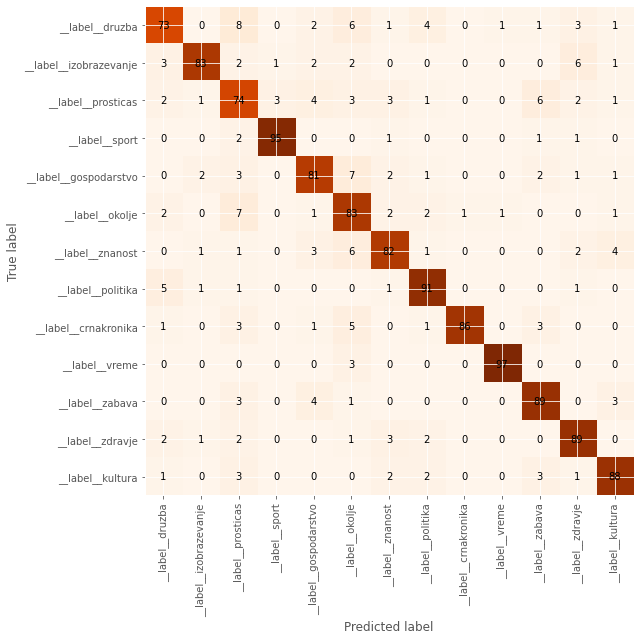

Micro F1: 0.8546, Macro F1: 0.8557
Testing took 0.02 minutes.


Training started for epoch_num 800.
Training finished. Testing started.
Training took 52.54 minutes.


<Figure size 432x288 with 0 Axes>

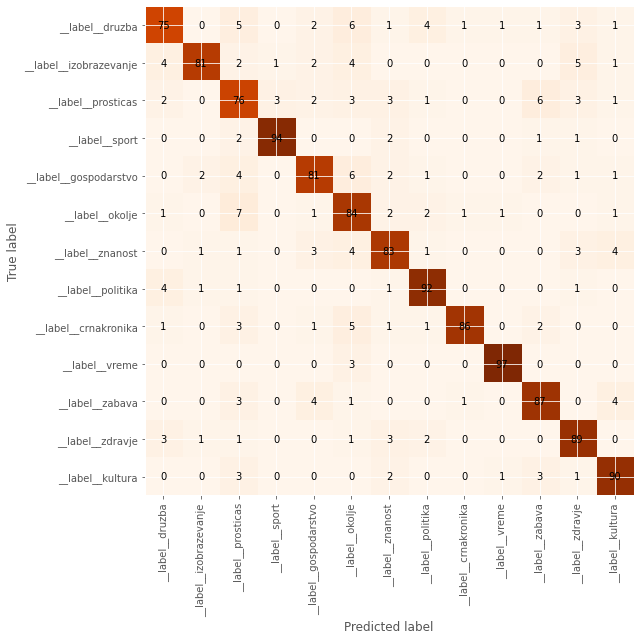

Micro F1: 0.8577, Macro F1: 0.8586
Testing took 0.02 minutes.


Training started for epoch_num 900.
Training finished. Testing started.
Training took 59.35 minutes.


<Figure size 432x288 with 0 Axes>

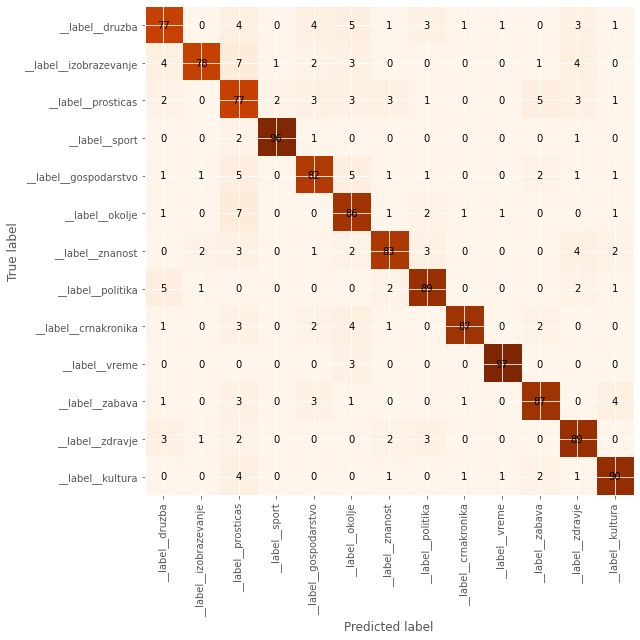

Micro F1: 0.86, Macro F1: 0.8612
Testing took 0.02 minutes.


Training started for epoch_num 1000.
Training finished. Testing started.
Training took 65.82 minutes.


<Figure size 432x288 with 0 Axes>

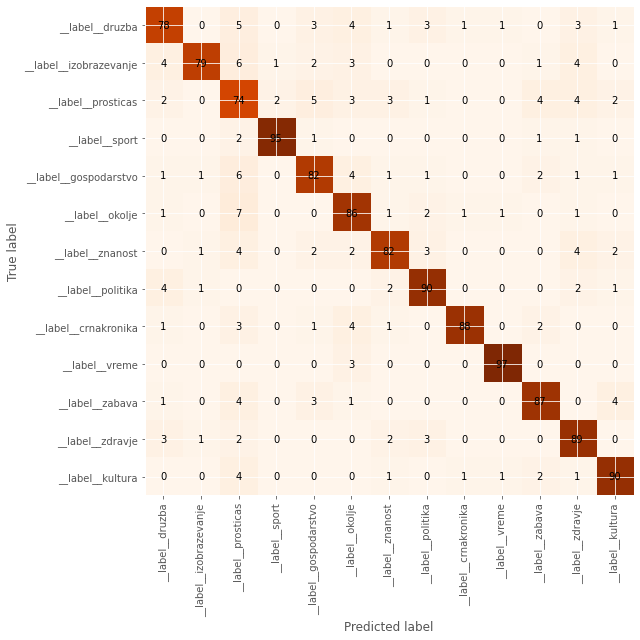

Micro F1: 0.8592, Macro F1: 0.8607
Testing took 0.02 minutes.




<Figure size 432x288 with 0 Axes>

In [ ]:
# Define which epochs we want to try
#exp_range = [10, 50, 100, 200]
# Additional experiments - the highest scores were achieved on 150 epochs
#exp_range = [300, 400, 500, 600]
exp_range = [700, 800, 900, 1000]

for i in exp_range:
    print(f"Training started for epoch_num {i}.")

    training_start_time = time.time()

    model = ft.train_supervised(input=train,
                                epoch = i,
                                #lr = 0.7,
                                #wordNgrams=1,
                                verbose = 2
                                            )

    print(f"Training finished. Testing started.")
    print(f"Training took {round((time.time() - training_start_time)/60,2)} minutes.")

    testing_start_time = time.time()
    # Parse the dev files so that labels and texts are separated
    y_true, y_texts = parse_file(dev)

    # Evaluate the model on dev data
    y_pred = model.predict(y_texts)
    y_pred = prediction_to_label(y_pred)

    # Plot the confusion matrix:
    m, M = plot_cm()
    
    rezdict = dict(
        microF1=m,
        macroF1=M,
        epoch_num = i,
    )
    results.append(rezdict)

    print(f"Testing took {round((time.time() - testing_start_time)/60,2)} minutes.\n\n")

In [ ]:
# Test the model
model.predict("V Celju se je zgodila nesreča, umrla je 42-letna ženska.")

(('__label__zabava',), array([1.00001001]))

In [ ]:
results

[{'microF1': 0.14923076923076922,
  'macroF1': 0.10702545099898456,
  'epoch_num': 10},
 {'microF1': 0.4930769230769231,
  'macroF1': 0.45653170709789204,
  'epoch_num': 50},
 {'microF1': 0.6476923076923077,
  'macroF1': 0.6283179859534564,
  'epoch_num': 100},
 {'microF1': 0.7584615384615384,
  'macroF1': 0.7586318276309054,
  'epoch_num': 200},
 {'microF1': 0.7846153846153847,
  'macroF1': 0.7847373442640907,
  'epoch_num': 300},
 {'microF1': 0.8215384615384616,
  'macroF1': 0.8224397778722572,
  'epoch_num': 400},
 {'microF1': 0.8361538461538461,
  'macroF1': 0.8372834685739888,
  'epoch_num': 500},
 {'microF1': 0.8484615384615385,
  'macroF1': 0.848980277020991,
  'epoch_num': 600},
 {'microF1': 0.8546153846153847,
  'macroF1': 0.8557064059060454,
  'epoch_num': 700},
 {'microF1': 0.8576923076923076,
  'macroF1': 0.8585717299272582,
  'epoch_num': 800},
 {'microF1': 0.8599999999999999,
  'macroF1': 0.8611873955163036,
  'epoch_num': 900},
 {'microF1': 0.8592307692307692,
  'macroF1

As we can see, the micro and macro F1 scores stop rising after 900 epochs - I will use 900 epochs for training the model.

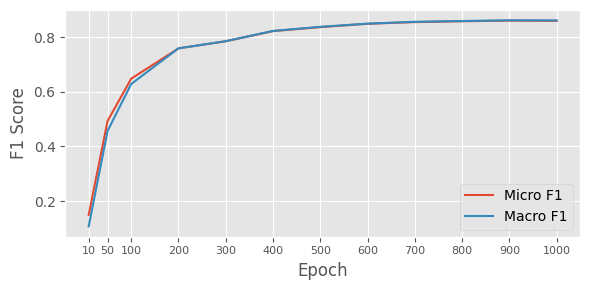

In [ ]:
# Analyse the results of experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use("ggplot")

# make data

x = []
mi = []
ma = []

for i in results:
    x.append(i['epoch_num'])
    mi.append(i['microF1'])
    ma.append(i["macroF1"])

# plot
plt.figure(figsize=(6,3), dpi=100)

plt.plot(x, mi, label="Micro F1")
plt.plot(x, ma, label="Macro F1")

plt.xticks(x, fontsize = 8)

plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend(loc="lower right")

plt.tight_layout()

#plt.savefig(Epoch-number-hyperparameter-search.png")
plt.show()


As we can see from the figure, the micro and macro F1 scores keep rising until the epoch 800, afterwards, the scores remain around 0.83. For testing, I will use 800 epochs.

In [ ]:
# Save results of the hyperparameter search as a JSON file
import json

with open("SLED-trainlarge-hyperparameter-search-results.json","w") as file:
  json.dump(results, file)

## Training the model and testing on the test set

Training started.
Training finished. Testing started.
Training took 60.11 minutes.


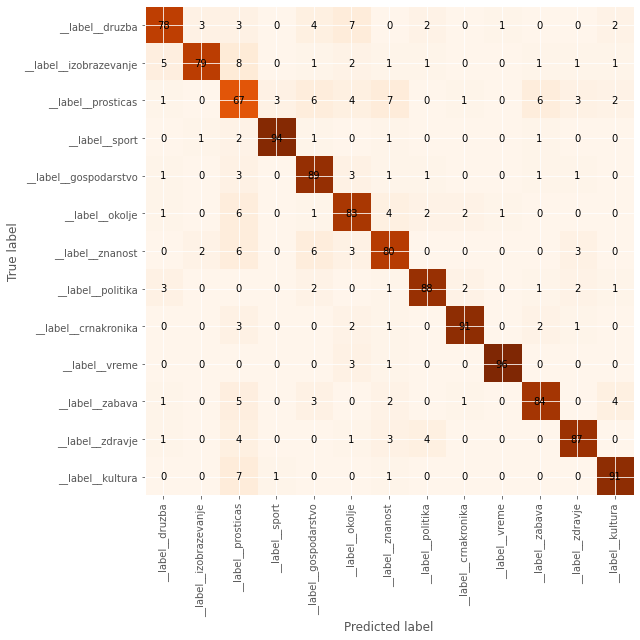

Micro F1: 0.8515, Macro F1: 0.8533
                        precision    recall  f1-score   support

       __label__druzba       0.86      0.78      0.82       100
__label__izobrazevanje       0.93      0.79      0.85       100
    __label__prosticas       0.59      0.67      0.63       100
        __label__sport       0.96      0.94      0.95       100
 __label__gospodarstvo       0.79      0.89      0.84       100
       __label__okolje       0.77      0.83      0.80       100
      __label__znanost       0.78      0.80      0.79       100
     __label__politika       0.90      0.88      0.89       100
  __label__crnakronika       0.94      0.91      0.92       100
        __label__vreme       0.98      0.96      0.97       100
       __label__zabava       0.88      0.84      0.86       100
      __label__zdravje       0.89      0.87      0.88       100
      __label__kultura       0.90      0.91      0.91       100

              accuracy                           0.85      1300
   

<Figure size 432x288 with 0 Axes>

In [ ]:
test_results = []

for i in [900]:
    print(f"Training started.")

    training_start_time = time.time()

    model = ft.train_supervised(input=train,
                                epoch = 900,
                                verbose = 2)

    print(f"Training finished. Testing started.")
    print(f"Training took {round((time.time() - training_start_time)/60,2)} minutes.")

    testing_start_time = time.time()
    
    # Parse the test files so that labels and texts are separated
    y_true, y_texts = parse_file(test)

    # Test the model on test data
    y_pred = model.predict(y_texts)
    y_pred = prediction_to_label(y_pred)

    # Plot the confusion matrix:
    m, M = plot_cm()
    
    rezdict = dict(
        microF1=m,
        macroF1=M,
        epoch_num = i,
        y_true = {"y_true": y_true, "y_texts": y_texts},
        y_pred = y_pred,
    )
    test_results.append(rezdict)

    # Add classification report
    print(classification_report(y_true, y_pred, labels=LABELS))

    print(f"Testing took {round((time.time() - testing_start_time)/60,2)} minutes.\n\n")

In [ ]:
# Inspect results in a dataframe format

df = pd.DataFrame(test_results)

df

,microF1,macroF1,epoch_num,y_true,y_pred
0,0.851538,0.85325,900,"{'y_true': ['__label__crnakronika', '__label__...","[__label__crnakronika, __label__crnakronika, _..."


As we can see, the results in different runs remain stable - the model achieves micro F1 0.8285 and macro F1 0.8282.

In [ ]:
# Save results as csv file
df.to_csv("SLED-results-on-test-trainlarge.csv", sep = "\t")

In [ ]:
# Save the model
model.save_model("FastText-model-trainlarge-noembeddings.bin")

In [ ]:
!pip install wandb
import wandb

# Login to wandb
wandb.login()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 122 kB 52.9 MB/s 
     |████████████████████████████████| 181 kB 56.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 157 kB 58.2 MB/s 
     |████████████████████████████████| 157 kB 59.3 MB/s 
     |████████████████████████████████| 157 kB 48.9 MB/s 
     |████████████████████████████████| 157 kB 59.8 MB/s 
     |████████████████████████████████| 157 kB 57.7 MB/s 
     |████████████████████████████████| 156 kB 47.9 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=236d362b6ac2687585411f373d290f32f7d352ab0501f4006a9959ae433b2db2
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Save the trained model to Wandb
run = wandb.init(project="SLED-categorization", name="saving-trainlarge-noembeddings-model")
trained_model_artifact = wandb.Artifact("SLED-categorization-trainlarge-noembeddings-model", type="model", description="a fastText model trained on the 'trainsmall' SLED dataset, trained without pre-trained embeddings.")
trained_model_artifact.add_dir("/content/model")
run.log_artifact(trained_model_artifact)

wandb: Adding directory to artifact (/content/model)... Done. 1.1s
